In [1]:
import os
import tarfile 
import urllib
import pandas as pd, numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# this helps with the width of the cells - i like when they are at 100 per - give more space to write code !!!
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# os.listdir('datasets/housing/')
# os.makedirs(housing_path)
os.listdir('datasets/housing/')

['housing.csv', 'images', '.ipynb_checkpoints', 'housing.tgz']

In [4]:
DOWNLOAD_ROOT='https://raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_PATH = os.path.join('datasets','housing')
HOUSING_URL  = DOWNLOAD_ROOT+'datasets/housing/housing.tgz'

In [5]:
def fectch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path = os.path.join(housing_path,'housing.tgz')
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [6]:
fectch_housing_data()

In [7]:
# help(urllib.request.urlretrieve)

In [8]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path= os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)

In [9]:
housing= load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


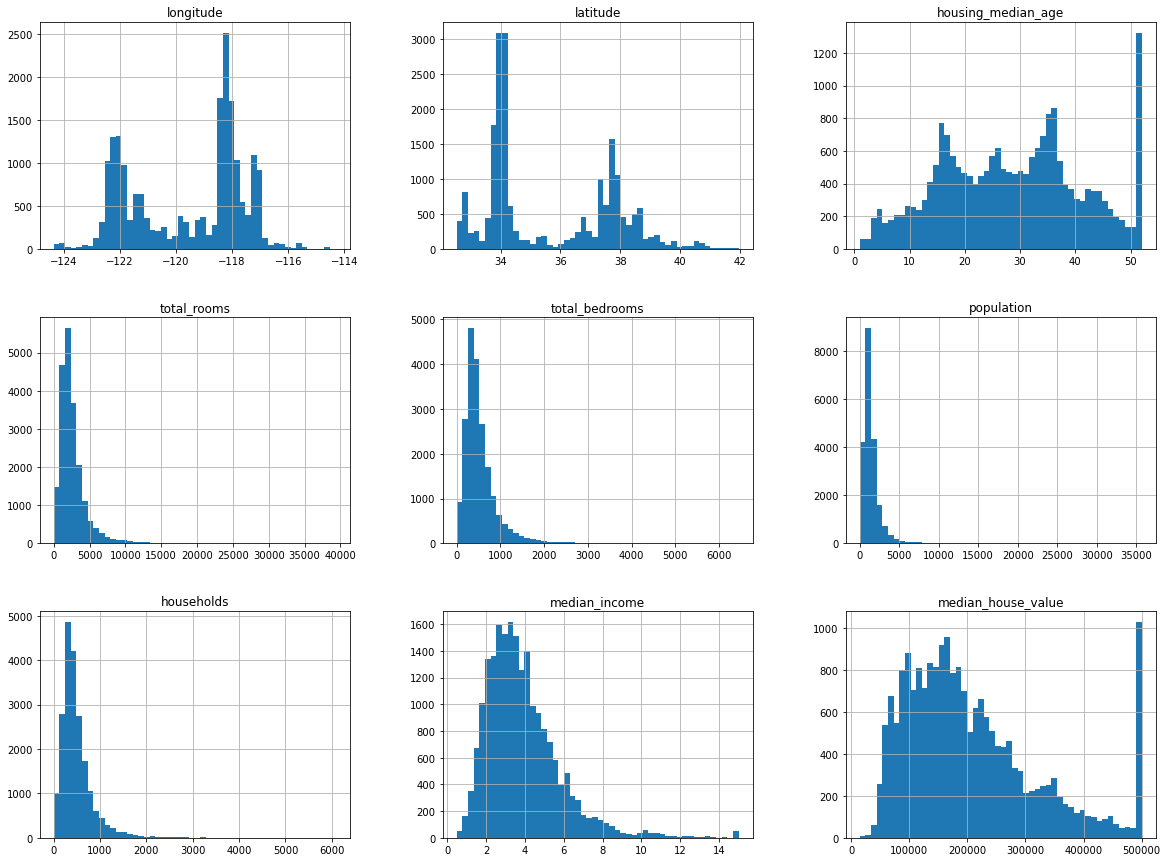

In [12]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [14]:
housing['income_cat']= pd.qcut(housing['housing_median_age'],
                              q=[0,.2,.4,.6,.8,1],
                              labels=[1,2,3,4,5])

In [15]:
split=StratifiedShuffleSplit(n_splits=1,random_state=40,test_size=.2)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [16]:
for x in (strat_train_set, strat_test_set):
    x.drop('income_cat', axis=1, inplace=True)

In [17]:
housing = strat_train_set.copy()
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [18]:
# Download the California image
images_path = os.path.join(HOUSING_PATH, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('datasets/housing/images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7fceb0d527c0>)

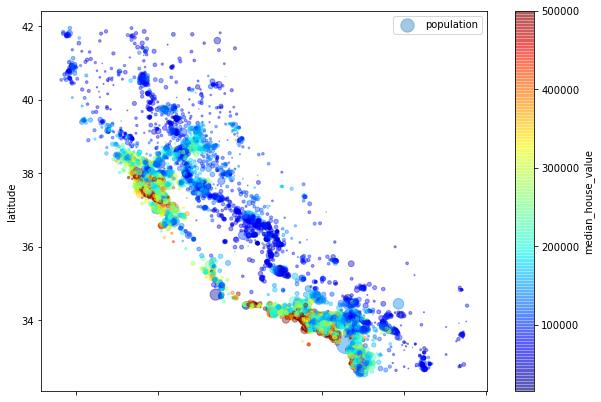

In [19]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=.4,
            s=housing['population']/100, label='population',figsize=(10,7),
            c='median_house_value',cmap=plt.get_cmap('jet'),colorbar='True')
plt.legend()

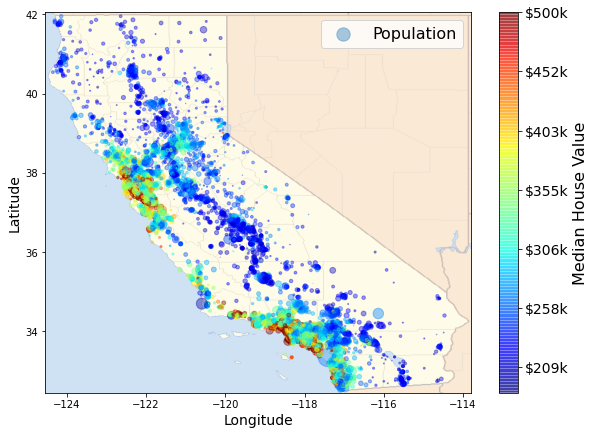

In [20]:
import matplotlib.image as mpimg
from matplotlib.pyplot import savefig
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
savefig("california_housing_prices_plot")
plt.show()

In [21]:
corr_matrix=housing.corr()
# corr_matrix
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688673
total_rooms           0.138852
housing_median_age    0.104151
households            0.072591
total_bedrooms        0.055005
population           -0.018441
longitude            -0.048046
latitude             -0.142956
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

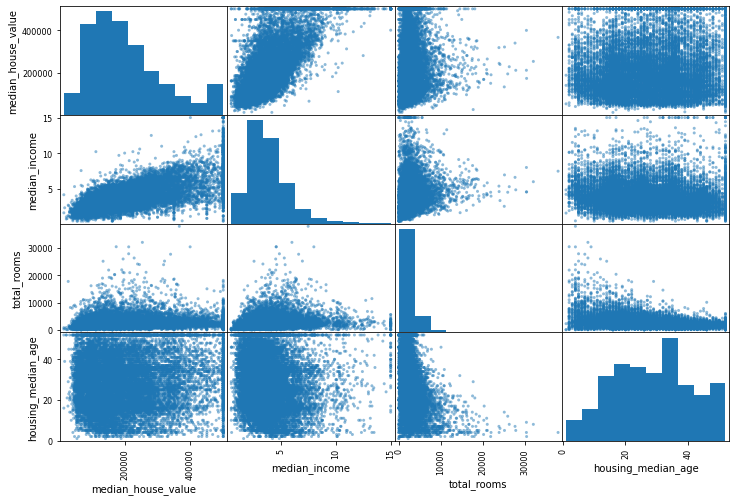

In [22]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
                  "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

housing.plot(kind='scatter', x='median_income', y ='median_house_value', alpha=.1, figsize =(10,7))

## Preparing data for Machine learning algorithms

In [23]:
# seperating the data and the label- dependent and independent
    
# housing.columns
housing = strat_train_set.drop('median_house_value', axis=1)
housing_label = strat_train_set['median_house_value'].copy()

In [24]:
# cool new way of selecting the subset basis dtypes

housing_num=housing.select_dtypes(include=[np.number])
housing_cat= housing.select_dtypes(exclude=[np.number])

### Missing values - Numerical

In [44]:
# imputation of the missing value in the numercial columns using the median.

from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='median')
imputer.fit(housing_num)
print(imputer.statistics_)
print(housing_num.median().values)
X=imputer.transform(housing_num)
housing_tr=pd.DataFrame(X, columns=housing_num.columns, index = housing.index)

[-118.49     34.26     29.     2119.      433.     1161.      408.
    3.5341]
[-118.49     34.26     29.     2119.      433.     1161.      408.
    3.5341]


### Handling Text and Categorical Attributes
If a categorical attribute has a large number of possible categories (e.g., country code, profession, species, etc.), then one-hot encod‐ ing will result in a large number of input features. This may slow down training and degrade performance. If this happens, you may want to replace the categorical input with useful numerical features related to the categories: for example, you could replace the ocean_proximity feature with the distance to the ocean (similarly, a country code could be replaced with the country’s population and GDP per capita). Alternatively, you could replace each category with a learnable low dimensional vector called an embedding. Each category’s representation would be learned during training: this is an example of representation learning 

In [45]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
cat_encoder.fit(housing_cat)
print(cat_encoder.categories_)
housing_cat_1hot

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

### Custom Transformers
Scikit-Learn relies on duck typing (not inher‐ itance), all you need is to create a class and implement three methods:
- fit() (returning self),
- transform(), and
- fit_transform().

You can get the last one for free by simply adding TransformerMixin as a base class. Also, if you add BaseEstima tor as a base class (and avoid *args and **kargs in your constructor) you will get two extra methods (get_params() and set_params()) that will be useful

In [57]:
from sklearn.base import BaseEstimator,TransformerMixin
col_names ='total_rooms','total_bedrooms', 'population', 'households'
room_ix, bedroom_ix,population_ix, household_ix =[housing.columns.get_loc(c) for c in col_names]

class CombinedAttributeAdder (BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room= add_bedrooms_per_room
    def fit(self, X,y=None):
        return self
    def transform (self, X):
        rooms_per_household=X[:,room_ix]/X[:,household_ix]
        population_per_houshold= X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room: X[:,bedroom_ix]/X[:,room_ix]
            return np.c_[X,rooms_per_household, population_per_houshold
                         ,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household, population_per_houshold]
        
        
        
# from sklearn.base import BaseEstimator, TransformerMixin

# # column index
# rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
#     def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
#         self.add_bedrooms_per_room = add_bedrooms_per_room
#     def fit(self, X, y=None):
#         return self  # nothing else to do
#     def transform(self, X):
#         rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
#         population_per_household = X[:, population_ix] / X[:, households_ix]
#         if self.add_bedrooms_per_room:
#             bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
#             return np.c_[X, rooms_per_household, population_per_household,
#                          bedrooms_per_room]
#         else:
#             return np.c_[X, rooms_per_household, population_per_household]

# attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
# housing_extra_attribs = attr_adder.transform(housing.values)

In [51]:
attr_adder= CombinedAttributeAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
print(housing_extra_attribs.shape)
print(housing.shape)
housing_extra_attribs= pd.DataFrame(housing_extra_attribs,
                                   columns=list(housing.columns)+['rooms_per_household','population_per_household'],
                                   index = housing.index)
print(housing_extra_attribs.columns)
housing_extra_attribs.head()

(16512, 11)
(16512, 9)
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'population_per_household'],
      dtype='object')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
4446,-118.21,34.07,31,1077,300,1198,274,2.1333,<1H OCEAN,4.37226,4.37226
16405,-121.2,38.02,44,608,108,287,83,3.3882,INLAND,3.45783,3.45783
17495,-119.8,34.44,27,2674,419,1176,416,5.0294,NEAR OCEAN,2.82692,2.82692
11128,-117.93,33.85,27,1962,544,1492,481,1.9621,<1H OCEAN,3.10187,3.10187
1849,-122.28,37.91,48,2083,298,685,286,7.3089,NEAR BAY,2.3951,2.3951


### Feature Scaling

- With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales.
- Note that scaling the target values is generally not required.
- There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

**Min-max scaling** (many people call this normalization) is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtract‐ ing the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called MinMaxScaler for this. It has a feature_range hyperparameter that lets you change the range if you don’t want 0–1 for some reason.

**Standardization** is quite different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. 

Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algo‐ rithms (e.g., neural networks often expect an input value ranging from 0 to 1). How‐ ever, standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called StandardScaler for stand‐ ardization.

**As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set). Only then can you use them to transform the training set and the test set (and new data).**

### Transformation Pipelines

In [58]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# num_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('attribute_adder', CombinedAttributeAdder()),
#     ('std_scaler', StandardScaler())
#     ])
# housing_num_tr=num_pipeline.fit_transform(housing_num)

UnboundLocalError: local variable 'bedrooms_per_room' referenced before assignment